In [1]:
from load_modules import *
import copy
import pickle

In [15]:
# Our
saved_NN = "../../data/Raman_Mouse/saved_neural_network_2023-04-26 18-03-38.413049"
with open(f"{saved_NN}//stats.pickle", 'rb') as handle:
    data_Our = pickle.load(handle)
    
# ALS
saved_NN = "../../data/Raman_Mouse/saved_neural_network_2023-04-26 16-29-33.000387"
with open(f"{saved_NN}//stats.pickle", 'rb') as handle:
    data_ALS = pickle.load(handle)
    
# airPLS
saved_NN = "../../data/Raman_Mouse/saved_neural_network_2023-04-26 17-05-45.248411"
with open(f"{saved_NN}//stats.pickle", 'rb') as handle:
    data_airPLS = pickle.load(handle)
    
# Our raw
saved_NN = "../../data/Raman_Mouse/saved_neural_network_2023-04-28 14-46-52.933403"
with open(f"{saved_NN}//stats.pickle", 'rb') as handle:
    data_Our_raw = pickle.load(handle)
    
# Our raw no RFFT
saved_NN = "../../data/Raman_Mouse/saved_neural_network_2023-04-28 14-07-46.599701"
with open(f"{saved_NN}//stats.pickle", 'rb') as handle:
    data_Our_RFFT = pickle.load(handle)
    
# Our raw no phase 3
saved_NN = "../../data/Raman_Mouse/saved_neural_network_2023-04-28 15-31-49.898120"
with open(f"{saved_NN}//stats.pickle", 'rb') as handle:
    data_Our_phase3 = pickle.load(handle)

In [3]:
print(data_Our.keys())
len(data_Our['MSE photo']) / len(data_Our['validation_loss'])

dict_keys(['train_loss', 'smoothness', 'compared_grad', '% error', 'MSE photo', 'MSE raman', 'validation_loss'])


2696.0

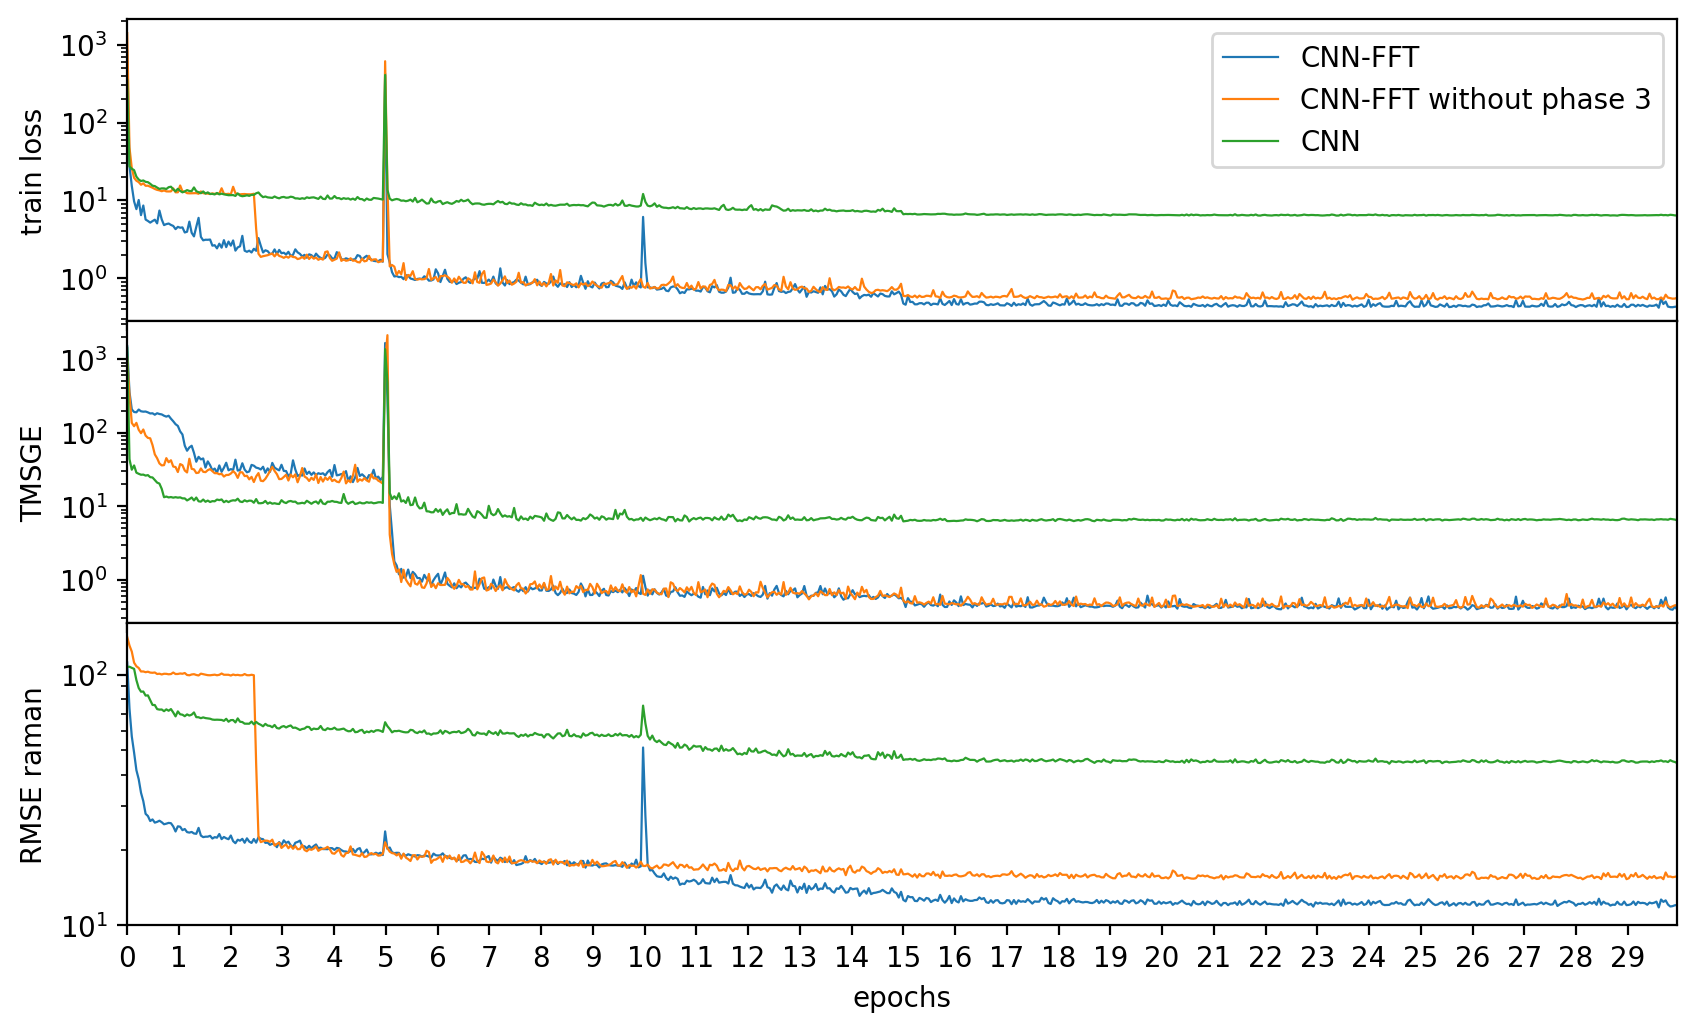

In [89]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['lines.linewidth'] = 0.8

epochs = 30
smoothing = 2696 // 8
smoothing = 337
smoothing = 4*30
# smoothing = 1

def avg_error(data):
    error_Our = copy.copy(data)

    error_Our = np.array(error_Our).reshape(-1, smoothing)
    return np.mean(error_Our, 1)

error_names = ["train_loss", "compared_grad", "MSE raman", ]
error_labels = ["train loss", "TMSGE", "RMSE raman"]

fig = plt.figure()
gs = fig.add_gridspec(3, 1, hspace=0)
axs = gs.subplots(sharex='col')

for i, error_name in enumerate(error_names):
    error_label = error_name.replace("_", " ")
    error_Our = avg_error(data_Our_raw[error_name])
    axs[i].plot(range(len(error_Our)), error_Our, label=f"CNN-FFT")
    error_Our = avg_error(data_Our_phase3[error_name])
    axs[i].plot(range(len(error_Our)), error_Our, label=f"CNN-FFT without phase 3")
    error_Our = avg_error(data_Our_RFFT[error_name])
    axs[i].plot(range(len(error_Our)), error_Our, label=f"CNN")
    
    axs[i].set_ylabel(f"{error_labels[i]}")
    axs[i].set_yscale("log")
    
    if i == 2:
        axs[i].set_ylim(10)
    
    if i == 0:
        axs[i].legend()
    
plt.xticks(ticks=np.linspace(0,len(error_Our), epochs+1), labels=range(0,epochs+1))
plt.xlim(0,len(error_Our)-1)
plt.xlabel("epochs")
plt.show()

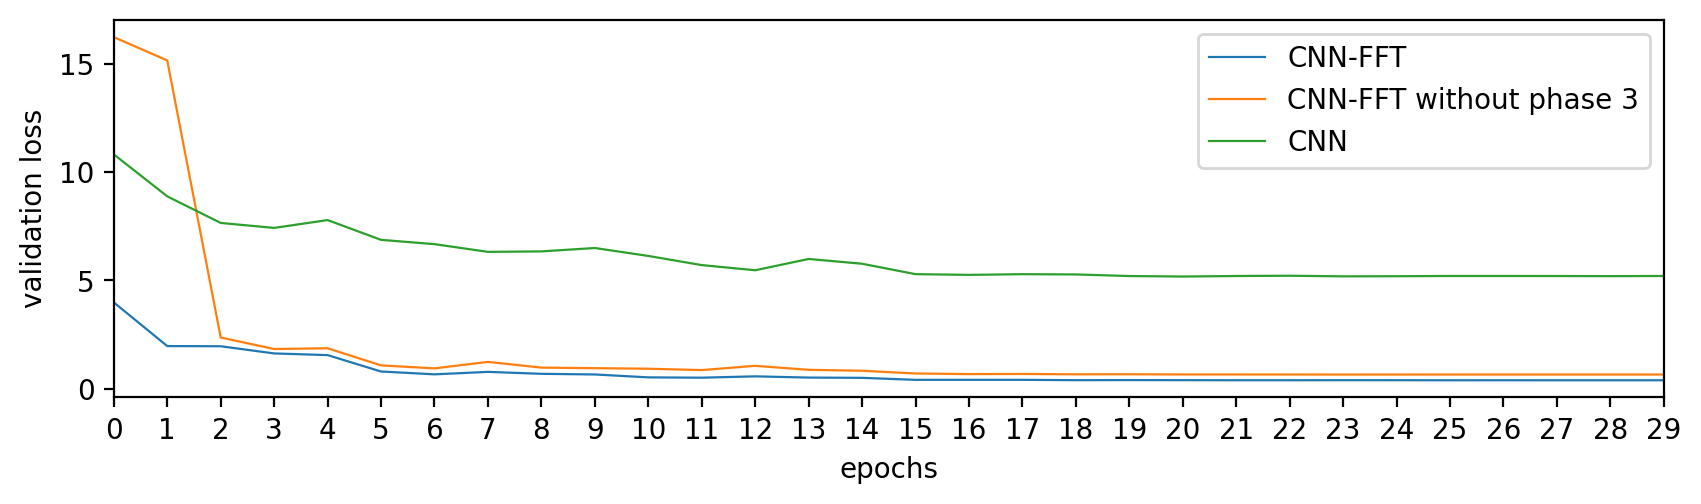

In [91]:
plt.rcParams['figure.figsize'] = (10.0, 2.5)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['lines.linewidth'] = 0.8

epochs = 30
smoothing = 1

error_name = "validation_loss"
error_label = error_name.replace("_", " ")
error_Our = avg_error(data_Our_raw[error_name])
plt.plot(range(len(error_Our)), error_Our, label=f"CNN-FFT")
error_Our = avg_error(data_Our_phase3[error_name])
plt.plot(range(len(error_Our)), error_Our, label=f"CNN-FFT without phase 3")
error_Our = avg_error(data_Our_RFFT[error_name])
plt.plot(range(len(error_Our)), error_Our, label=f"CNN")


plt.xticks(ticks=np.linspace(0,len(error_Our), epochs+1), labels=range(0,epochs+1))
plt.xlim(0,len(error_Our)-1)

plt.xlabel("epochs")
plt.ylabel("validation loss")
plt.legend()
plt.show()